# Develop Deep Learning Models for Natural Language in Python

## 4 - How to Develop Deep Learning Models with Keras


### 4.1 - Keras Model Life-*Cycle*

In [29]:
from keras.layers import Dense

# Define the model
model = keras.Sequential()

# Add layers to the model
model.add(Dense(units = 5, input_shape = (2, ), activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the model
model.compile(optimizer = 'sgd', loss = 'mean_squered_error', metrics = ['mae'])

# Overall view of the model
model.summary()

# Fit the model
model.fit(X, y, epochs = 100, batch_size = 10, verbose = False)

# Evaluate on validation data
loss, mae = model.evaluate(X, y, verbose = True)

# Predict on test data
predictions = model.predict(X, verbose = False)

### 4.2 - Keras Functional Models

In [30]:
from keras.layers import Dense, Input
from keras.models import Model

# Explicate input layer
visible = Input(shape = (2, ))

# Hidden layer & chaining
hidden = Dense(units = 2)(visible)

# Build the model
model = Model(inputs = visible, outputs = hidden)

### 4.3 - Standard Network Models

#### 4.3.1 - Multilayer Perceptron

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


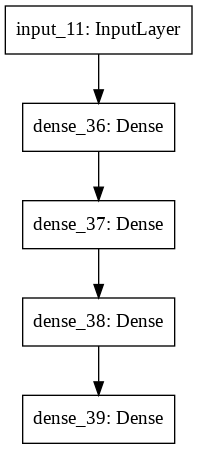

In [27]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils.vis_utils import plot_model

# Input layer
visible = Input(shape = (10, ))

# Hidden layers
hidden_1 = Dense(units = 10, activation = 'relu')(visible)
hidden_2 = Dense(units = 20, activation = 'relu')(hidden_1)
hidden_3 = Dense(units = 10, activation = 'relu')(hidden_2)

# Output layer
output = Dense(1, activation = 'sigmoid')(hidden_3)

# Build model
model = Model(inputs = visible, outputs = output)
model.summary()

plot_model(model, to_file = 'multilayer perceptron graph.png')

#### 4.3.2 - Convolutional Neural Network

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_43 (Dense)             (None, 13, 13, 10)        170       
_________________________________________________________________
dense_44 (Dense)             (None, 13, 13, 1)         11  

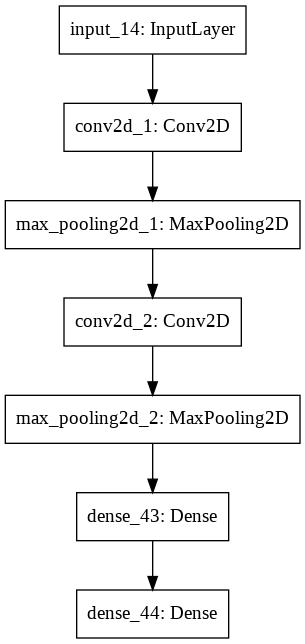

In [34]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

# Input layer
visible = Input(shape = (64, 64, 1))

conv_1 = Conv2D(filters = 32, kernel_size = 4, activation = 'relu')(visible)
pool_1 = MaxPooling2D(pool_size = (2, 2))(conv_1)

conv_2 = Conv2D(filters = 16, kernel_size = 4, activation = 'relu')(pool_1)
pool_2 = MaxPooling2D(pool_size = (2, 2))(conv_2)

hidden_1 = Dense(10, activation = 'relu')(pool_2)
output = Dense(1, activation = 'sigmoid')(hidden_1)

model = Model(inputs = visible, outputs = output)
model.summary()

plot_model(model, to_file = 'convolutional neural network.png')

#### 4.3.3 - Recurrent Neural Network

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


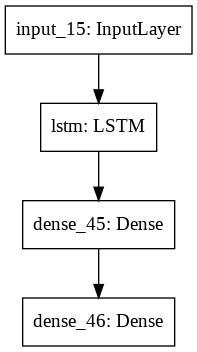

In [35]:
from keras.layers import Dense, Input
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers.recurrent import LSTM

# Input layer
visible = Input(shape = (100, 1))

# Hidden layers
hidden_1 = LSTM(units = 10)(visible)
hidden_2 = Dense(units = 10, activation = 'relu')(hidden_1)

# Output layer
output = Dense(units = 1, activation = 'sigmoid')(hidden_2)

model = Model(inputs = visible, outputs = output)
model.summary()

plot_model(model, to_file = 'recurrent neural network.png')